# Hypothesis Testing

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import itertools

## Null and Alternative Hypotheses

A toy picture of science has it that the scientist formulates a hypothesis that explains or generalizes from some set of observations, and then conducts some experiment, which will either confirm or refute that hypothesis.

But this is an oversimplification of good practice. Consider the possibility that the experiment yield statistically improbable results. In that case it may well be a mistake to generalize from those results or to reject an hypothesis that doesn't predict them.

Often the confirmation of some testing or **alternative hypothesis, $H_\alpha$**, is a _relative_ affair, where it is measured against some **null hypothesis, $H_0$**.

If an alternative hypothesis states that there is some significant relationship between two variables, then the null hypothesis simply states that there is no such relationship.

If we're testing the function of a new drug, then the null hypothesis will say that the drug has _no effect_ on patients, or anyway no effect relative to relief of the malady the drug was designed to combat. If we're testing whether Peeps cause dementia, then the null hypothesis will say that there is _no correlation_ between Peeps consumption and rate of dementia development.

## $p$-Values

The basic idea of a p-value is to quantify the probability that the results seen are in fact the result of mere random chance. This is connected with the null hypothesis since, if the null hypothesis is true and there is no significant correlation between the population variables X and Y, then of course any correlation between X and Y observed in our sample would have to be the result of mere random chance.

### How Unlikely Is Too Unlikely?

Suppose we calculate a p-value for some statistic we've measured (more on this below!) and we get a p-value of 20%. This would mean that there is a 20% chance that the results we observed were the result of mere random chance. Probably this is high enough that we ought _not_ to reject the null hypothesis that our variables are uncorrelated.

In practice, a p-value _threshold_ of 5% is very often the default value for these tests of statistical significance. Thus, if it is calculated that the chance that the results we observed were actually the result of randomness is less than 1 in 20, then we would _reject_ the null hypothesis and _accept_ the alternative hypothesis.

## An Example

Let's work with the normal distribution, since it's so useful. Suppose we are told that African elephants have weights distributed normally around a mean of 9000 lbs., with a standard deviation of 900 lbs. Pachyderm Adventures has recently measured the weights of 25 African elephants in Gabon and has calculated their average weight at 8637 lbs. They claim that these statistics on the Gabonese elephants are significant. Let's find out!

What is our null hypothesis here?

In [1]:
# NH: The null hypothesis is that the Gabonese elephants' weights are
# no different from the general population.

What is our alternative hypothesis here?

In [3]:
# AH: The alternative hypothesis is that the Gabonese elephants' weights
# are different from the general population.

Let's set a threshold value of $p = 0.05$ for rejecting the null hypothesis.

The standard error for our sample is:
$\large\frac{\sigma}{\sqrt{n}} = \frac{900}{\sqrt{25}} = 180$.

In [8]:
se = 900 / np.sqrt(25)
se

180.0

The z-score will be: $\large\frac{\bar{x} - \mu}{se} = \frac{8637 - 9000}{180} = -\frac{363}{180} = -2.02$.

In [7]:
z = (8637 - 9000) / 180
z

-2.0166666666666666

In [22]:
stats.norm.sf(z) # This is the "survival function": 1 - cdf(z)

0.97813484463207

The "area of the tail" corresponding to this z-score is only 2.2%. The area for both tails is thus 4.4%, still less than our 5% threshold value.

Thus we ought to reject the null hypothesis and conclude that the Gabonese elephants are statistically significant!

## Type 1 Errors (False Positives) and Type 2 Errors (False Negatives)

Most tests for the presence of some factor are imperfect. And in fact most tests are imperfect in two ways: They will sometimes fail to predict the presence of that factor when it is after all present, and they will sometimes predict the presence of that factor when in fact it is not. Clearly, the lower these error rates are, the better, but it is not uncommon for these rates to be between 1% and 5%, and sometimes they are even higher than that. (Of course, if they're higher than 50%, then we're better off just flipping a coin to run our test!)

Predicting the presence of some factor (i.e. counter to the null hypothesis) when in fact it is not there (i.e. the null hypothesis is true) is called a **"false positive"**. Failing to predict the presence of some factor (i.e. in accord with the null hypothesis) when in fact it is there (i.e. the null hypothesis is false) is called a **"false negative"**.

### A Function

Suppose I start flipping the same coin twice a day. What I'm curious about is whether the coin is fair or not.

My null hypothesis will be that there is "nothing to see here", i.e. that the coin is after all fair. The alternative hypothesis will of course be that the coin is not.

- **NH**: The coin is fair.
- **AH**: The coin is biased.

My statistical test will consist of flipping the coin a number of times and looking at those flips' results.

If the coin is fair, then my test will result either in a true negative (accurate) or a false positive (inaccurate). If the coin is biased, then the test will result either in a true positive (accurate) or a false negative (inaccurate).

Suppose that I set my value for $\beta$. What I want to understand is how the threshold for rejection of the null hypothesis varies as a function of $\beta$ and of the number of tosses $k$ that come up "heads".

I want to write a function that will tell me, given inputs for $p$ and $k$, how many tosses I would need to make before I should reject the null hypothesis.

We'll use the ```.binom_test()``` method in scipy's stats module.

In [65]:
def reject_null(k, beta=0.05, p=0.5, test_alternative='less'):
    n = k
    pct = stats.binom_test(k, n, p, alternative=test_alternative)
    pct = stats.binom_test([k, n-k], p, alternative=test_alternative)
    while pct >= beta:
        n += 1
        pct = stats.binom_test(k, n, p, alternative=test_alternative)
    return n

In [66]:
reject_null(10)

30

## Power of a Statistical Test

The power of a statistical test is simply P(reject null | null is false). That is, a test's power grows with the chance that we shall accurately reject the null hypothesis.

If $\beta$ is the probability of a false negative, i.e. the probability that we fail to reject the null hypothesis when it is false, then clearly the power of an associated test is simply $1 - \beta$.

### Example of Power Growing with Sample Size
Consider some particular null hypothesis to the effect that Hepomanol, an experimental drug, has no effect in the treatment of liver cancer. And suppose in fact that this hypothesis is false. A typical test for the effectiveness of Hepomanol would involve patients with liver cancer taking both Hepomanol and a placebo. Some patients would show amelioration of symptoms and others would not. Given that the null hypothesis is false, we ought to expect to see a correlation between those who took Hepomanol and those who experienced relief of symptoms. But the probability that we might, by random chance, see _no_ correlation is higher for smaller sample sizes. The more patients we test, the more likely we are to observe the actually existing correlation. Thus, all else equal, tests involving larger samples will have higher degrees of power.

Suppose in particular that we have the following data about our liver cancer patients.

1. The average tumor length for those given a placebo is 5 cm.
2. The tumor lengths for the ten patients given Hepomanol are:

5, 2, 2, 5, 2.5, 2, 2, 3, 2.5, 2.25

Hepomanol has in fact had great success, and so we'll assume that the null hypothesis is in fact false.

Our statistical test will take the form of sampling from this population of ten. We'll see that the larger the sample is, the greater is the power of the test.

We'll be using a t-test here, so we'll need to have access to t-critical values: http://www.meracalculator.com/math/t-distribution-critical-value-table.php

We'll also need the standard deviation of our sample.

In [2]:
# Calculating the power of a statistical test:


data = pd.Series([5, 2, 2, 5, 2.5, 2, 2, 3, 2.5, 2.25])

Suppose we only take 2 samples. In that case, with a one-tail test with 5% threshold, there's only one degree of freedom and so our critical value is -6.31. So our chance of rejecting the null hypothesis is just the chance that our statistic $t\leq -6.31$.

t is calculated as follows: $\Large\frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$.


There are $10\choose 2$ ($=45$) ways of selecting two data points from a population of ten. The loop below counts the number of times that we would reject the null hypothesis. Thus we can calculate the power of our test by simply taking that number and dividing by $45$.

In [3]:
ctr = 0
for i in range(len(data)):
    for j in range(i + 1, len(data)):
        if np.std([data[i], data[j]]) != 0:
            if (np.mean([data[i], data[j]]) - 5) / (np.std([data[i], data[j]]) / 2 ** 0.5) <= -6.31:
                ctr += 1
        else:
            if data[i] == 5:
                pass
            else:
                ctr += 1
power = ctr / 45
power

0.6222222222222222

What about for sample size of three?

In [4]:
ctr = 0
for i in range(len(data)):
    for j in range(i + 1, len(data)):
        for k in range(j + 1, len(data)):
            if np.std([data[i], data[j], data[k]]) != 0:
                if (np.mean([data[i], data[j], data[k]]) - 5) / (np.std([data[i], data[j], data[k]]) / 3 ** 0.5) <= -2.92:
                    ctr += 1
            else:
                if data[i] == 5:
                    pass
                else:
                    ctr += 1
power = ctr / 120
power

0.4666666666666667

Let's just write a function already that will calculate the statistical power of our test for _any_ sample size and _any_ data!

In [3]:
def stat_power(n, obs=data):
    ctr = 0
    combs = list(itertools.combinations(obs, n))
    for sample in combs:
        if np.std(sample) != 0:
            if (np.mean(sample) - 5) / (np.std(sample) / n ** 0.5) <= -stats.t.ppf(0.95, df=n-1):
                ctr += 1
        else:
            if sample[0] == 5:
                pass
            else:
                ctr += 1
    power = ctr / len(combs)
    return power

In [8]:
stat_power(6, obs=pd.Series([5, 2, 2, 5, 2.5, 2, 2, 3, 2.5, 2.25,
                            4, 1, 1.5, 2, 3, 2.75, 2, 2.1, 6, 1.25]))

0.9824819401444789

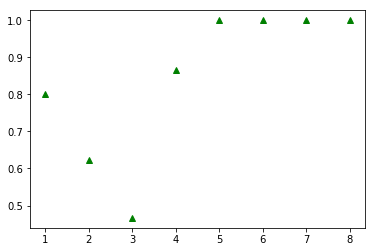

In [78]:
from matplotlib import pyplot as plt
X = range(1, 9)
y = [stat_power(i) for i in X]

plt.plot(X, y, 'g^');